In [16]:
# 난방효율성 데이터
# 18가지의 건축 특성을 지닌 12가지의 건축 속성, 총 768채의 주택 조사
# X1 : 상대적 크기
# X2 : 건축 표면적
# X3 : 벽체 면적
# X4 : 지붕 면적
# X5 : 전체 높이
# X6 : 건물의 방위
# X7 : 유리창 면적
# X8 : 유리창 면적의 분산
# Y1 : 난방 하중 → 실습데이터  
# Y2 : 냉방 하중

import pandas as pd

df = pd.read_csv("c:/data/energy/ENB2012_data.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [17]:
train_cols = df.columns[0:8]
print(train_cols)
X = df[train_cols]  # 독립변수
y = df["Y1"]  # 난방하중

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')


In [18]:
y.value_counts()

Y1
15.16    6
13.00    5
15.55    4
10.68    4
28.15    4
        ..
10.47    1
33.21    1
36.77    1
36.71    1
16.64    1
Name: count, Length: 586, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<Axes: >

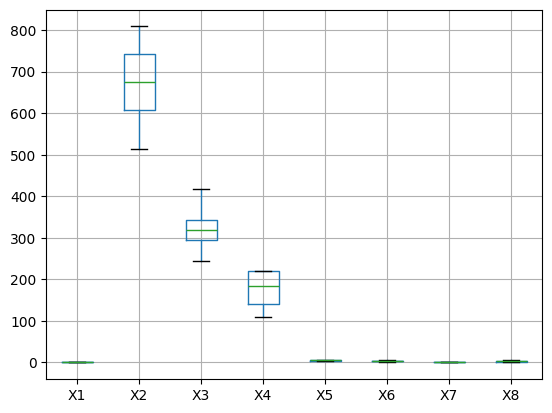

In [20]:
X.boxplot()

In [21]:
# Standardization 표준화, 평균 0, 표준편차 1
# 데이터를 0을 중심으로 양쪽으로 분포시키는 방법
# 평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값
# (측정값-평균) / 표준편차
# k-means, svm 등 거리 기반의 모델에서 주로 사용함
# 변수의 단위가 다른 경우 가중치가 부여되어 노이즈가 생길 수 있다
# 1000원과 1달러(가중치)가 1000배가 되지 않도록 해야 함

# 학습용 데이터셋의 변수들의 평균값 계산
mean_on_train = X_train.mean(axis=0)

# 학습용 데이터셋의 변수들의 표준편차값 계산
std_on_train = X_train.std(axis=0)

# 값에서 평균을 빼고 표준 편차로 나누면 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train

# 검증용 데이터셋에도 같은 계산 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train

print(X_train_scaled.describe())
print(X_test_scaled.describe())

                 X1            X2            X3            X4            X5  \
count  5.760000e+02  5.760000e+02  5.760000e+02  5.760000e+02  5.760000e+02   
mean  -4.317534e-16 -1.295260e-16  4.471732e-16  2.898916e-16  9.251859e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.346764e+00 -1.817237e+00 -1.712958e+00 -1.498746e+00 -9.751352e-01   
25%   -9.654262e-01 -7.719025e-01 -5.749374e-01 -6.825365e-01 -9.751352e-01   
50%   -2.027511e-01  1.340545e-01 -5.927190e-03  9.498830e-01 -9.751352e-01   
75%    6.552584e-01  9.703225e-01  5.630831e-01  9.498830e-01  1.023718e+00   
max    2.085274e+00  1.527835e+00  2.270114e+00  9.498830e-01  1.023718e+00   

                 X6            X7            X8  
count  5.760000e+02  5.760000e+02  5.760000e+02  
mean   1.757853e-16  2.390063e-16  6.784696e-17  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -1.329847e+00 -1.775710e+00 -1.827180e+00  
25%   -4.297389e-01 -1.026125e+00 -5.2

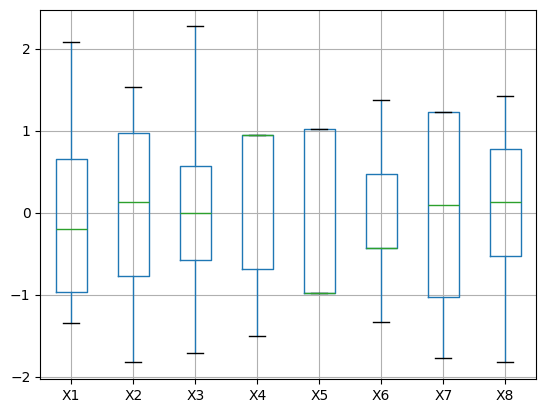

In [22]:
import matplotlib.pyplot as plt

X_train_scaled.boxplot()
plt.show()  # → 평균 0, 표준편차 1

In [23]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train_scaled, y_train)

model.predict(X_test_scaled)[:10]

array([15.29 , 10.455, 36.3  , 16.695, 32.54 , 28.94 , 28.485, 28.945,
       28.915, 30.615])

In [24]:
y_test.values[:10]

array([15.18, 10.32, 37.26, 16.95, 32.26, 27.9 , 28.18, 28.95, 29.07,
       23.8 ])

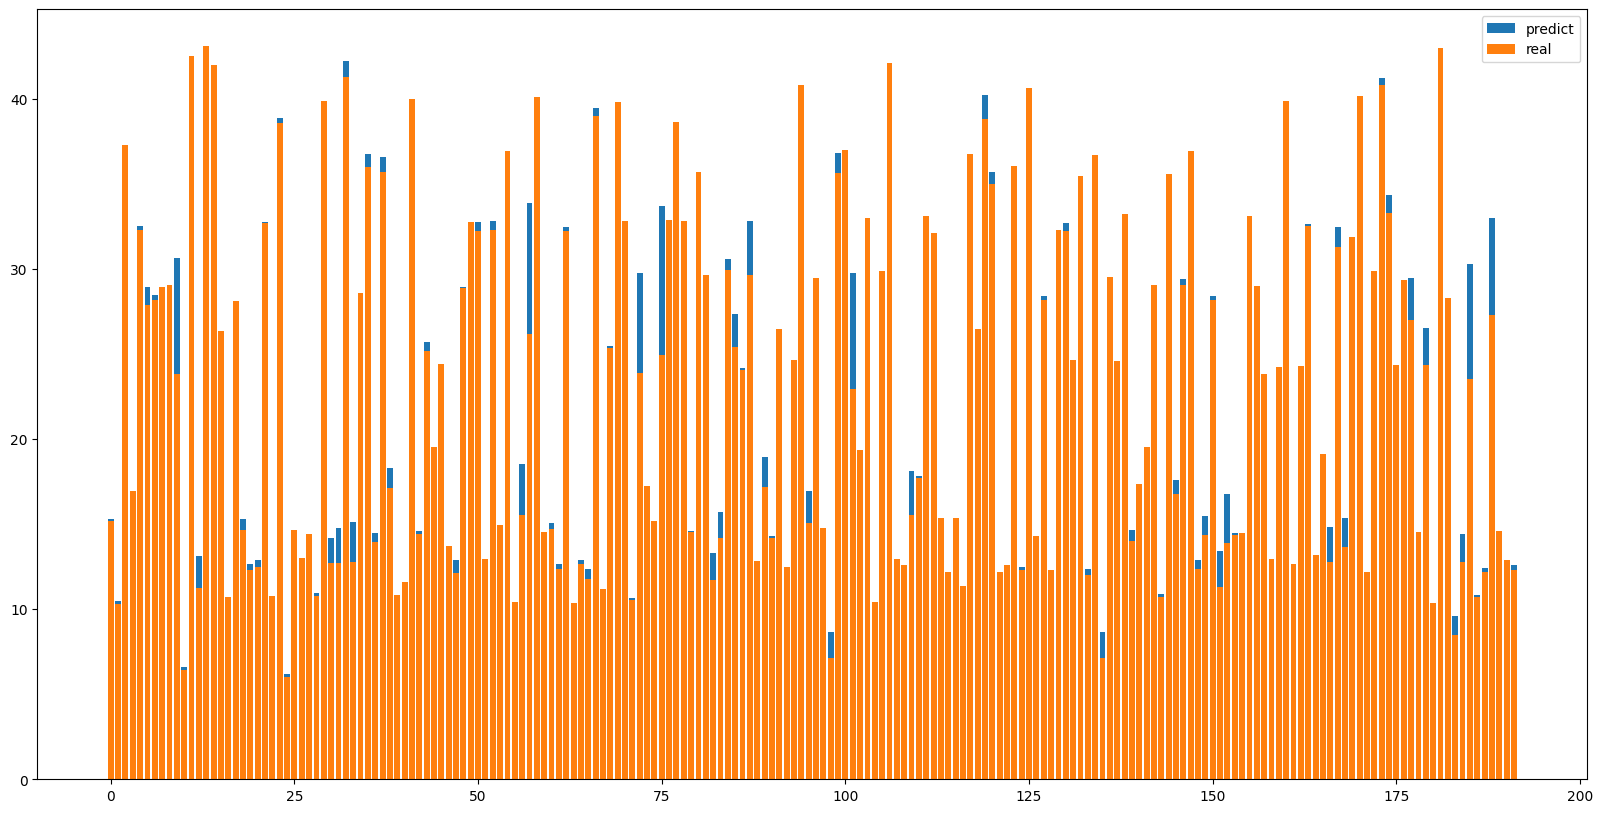

In [25]:
plt.figure(figsize=(20, 10))
plt.bar(range(len(y_test)), model.predict(X_test_scaled), label="predict")
plt.bar(range(len(y_test)), y_test.values, label="real")
plt.legend()
plt.show()

In [26]:
# score() 함수의 결과값 - R Squared → 0.0~1.0 모델의 설명력
model.score(X_test_scaled, y_test)

0.9488237490773516

In [27]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, model.predict(X_test_scaled)))
print(mean_squared_error(y_test, model.predict(X_test_scaled)) ** 0.5)  # rmse

5.527708333333334
2.3511078948728263
